<a href="https://colab.research.google.com/github/abduallhm19988/12-project/blob/main/soft_poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import drive
SEED=30


In [ ]:
# Load the dataset
data = pd.read_csv('/content/TUANDROMD.csv')

# Define class labels
classes = {0: 'Goodware', 1: 'Malware'}

# Display value counts of target variable
print(data['Label'].value_counts())


Label
1.0    3565
0.0     899
Name: count, dtype: int64


In [ ]:
# Display the first few rows of the dataset
data.head()



,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.dtypes

ACCESS_ALL_DOWNLOADS                                        float64
ACCESS_CACHE_FILESYSTEM                                     float64
ACCESS_CHECKIN_PROPERTIES                                   float64
ACCESS_COARSE_LOCATION                                      float64
ACCESS_COARSE_UPDATES                                       float64
                                                             ...   
Landroid/telephony/TelephonyManager;->getSimOperatorName    float64
Landroid/telephony/TelephonyManager;->getSimCountryIso      float64
Landroid/telephony/TelephonyManager;->getSimSerialNumber    float64
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    float64
Label                                                       float64
Length: 242, dtype: object

In [ ]:

classes = {0: 'Goodware', 1: 'Malware'}
data['Label'].value_counts()



Label
1.0    3565
0.0     899
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(242)
memory usage: 8.2 MB


In [ ]:
# total null elements

data.isnull().sum()[data.isnull().sum() > 0]

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)



In [ ]:

# Separate features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

Feature Importance

In [ ]:
# Calculate feature importance using Mutual Information and Point-Biserial correlation
point_biserial_coefs = []
for i in range(X.shape[1]):
    coef = stats.pointbiserialr(X.iloc[:, i], y)[0]
    point_biserial_coefs.append(coef)

mutual_inf = mutual_info_classif(X, y)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({'Mutual Inf': mutual_inf, 'Point-BiSerial': point_biserial_coefs}, index=X.columns)

In [ ]:
# Sort feature importance based on 'Point-BiSerial' column in descending order
sorted_feature_importance = feature_importance.sort_values(by='Point-BiSerial', ascending=False)

print(sorted_feature_importance)

                           Mutual Inf  Point-BiSerial
RECEIVE_BOOT_COMPLETED       0.239490        0.760417
GET_TASKS                    0.158630        0.563214
WAKE_LOCK                    0.090388        0.472105
KILL_BACKGROUND_PROCESSES    0.106254        0.438312
SYSTEM_ALERT_WINDOW          0.045666        0.281178
...                               ...             ...
SEND                         0.000000             NaN
WRITE                        0.000000             NaN
WRITE_AVSETTING              0.000000             NaN
WRITE_DATA                   0.000314             NaN
WRITE_DATABASES              0.002007             NaN

[241 rows x 2 columns]


In [ ]:
feature_importance.sort_values(by = 'Mutual Inf', ascending = False)


,Mutual Inf,Point-BiSerial
RECEIVE_BOOT_COMPLETED,0.239490,0.760417
Ljava/net/URL;->openConnection,0.208664,-0.712211
Landroid/location/LocationManager;->getLastK0wnLocation,0.174803,-0.653875
GET_TASKS,0.158630,0.563214
KILL_BACKGROUND_PROCESSES,0.106254,0.438312
...,...,...
MOUNT_FORMAT_FILESYSTEMS,0.000000,0.063799
MODIFY_PHONE_STATE,0.000000,0.026908
MEDIA_CONTENT_CONTROL,0.000000,0.015230
JPUSH_MESSAGE,0.000000,NaN


In [ ]:
# drop highly correlated features
X.drop(['RECEIVE_BOOT_COMPLETED', 'GET_TASKS', 'Ljava/net/URL;->openConnection'], axis = 1, inplace = True)

In [ ]:
print(X.columns)


Index(['ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM',
       'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_COARSE_LOCATION',
       'ACCESS_COARSE_UPDATES', 'ACCESS_FINE_LOCATION',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION',
       'ACCESS_MTK_MMHW', 'ACCESS_NETWORK_STATE',
       ...
       'Landroid/content/pm/PackageManager;->getInstalledPackages',
       'Landroid/telephony/TelephonyManager;->getLine1Number',
       'Landroid/telephony/TelephonyManager;->getNetworkOperator',
       'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
       'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimOperator',
       'Landroid/telephony/TelephonyManager;->getSimOperatorName',
       'Landroid/telephony/TelephonyManager;->getSimCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
       'Lorg/apache/http/impl/client/DefaultHttpClient;->execute'],
      dtype='object', length=2

In [ ]:
SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = SEED)

print('train samples ->', X_train.shape)
print('test samples ->', X_test.shape)

train samples -> (3348, 238)
test samples -> (1116, 238)


In [ ]:
# Scaling numerical data
MM = MinMaxScaler()
MM_fit = MM.fit(X_train)
X_train = MM_fit.transform(X_train)
X_test = MM_fit.transform(X_test)


In [ ]:
# Initialize the SVM model
model = SVC(kernel='linear', random_state=SEED)

# Train the model on the training data
model.fit(X_train, y_train)



SVC(kernel='linear', random_state=30)

In [ ]:
# Make predictions
pred = model.predict(X_test)

# Calculate Mean Squared Error and Accuracy Score
acc = accuracy_score(y_test, pred)

print('Mean Squared Error : {0:.5f}'.format(mse))
print('Accuracy Score : {0:.2f} %'.format(acc * 100))

Mean Squared Error : 0.02061
Accuracy Score : 97.94 %


              precision    recall  f1-score   support

    Goodware       0.95      0.95      0.95       231
     Malware       0.99      0.99      0.99       885

    accuracy                           0.98      1116
   macro avg       0.97      0.97      0.97      1116
weighted avg       0.98      0.98      0.98      1116



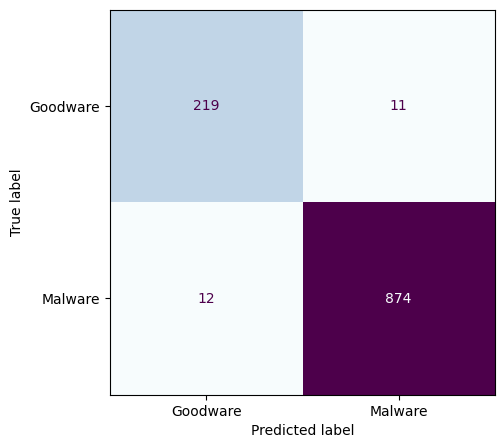

In [ ]:
# classification report

clf_report = classification_report(pred, y_test, target_names = list(classes.values()))
print(clf_report)
# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(classes.values()))

fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap='BuPu', colorbar=False)

In [ ]:


# Define GA hyperparameters
size = 100  # Population size
n_feat = X_train.shape[1]  # Number of features
n_parents = 50  # Number of parents to select
mutation_rate = 0.1  # Mutation rate
n_gen = 100  # Number of generations

In [ ]:
# Function for initialization of population in GA
def initialization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train[:, chromosome], y_train)
        predictions = model.predict(X_test[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

In [ ]:
# Function for selection in GA
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [ ]:
# Function for crossover in GA
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [ ]:
# Function for mutation in GA
def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = np.random.randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
# Function for GA generations
def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])  # Print best score in each generation
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

In [ ]:
# Run GA after hyperparameter optimization
best_chromo, best_score = generations(size, n_feat, n_parents, mutation_rate, n_gen,
                                                               X_train, X_test, y_train, y_test)

Best score in generation 1 : [0.9802867383512545]
Best score in generation 2 : [0.9811827956989247]
Best score in generation 3 : [0.9811827956989247]
Best score in generation 4 : [0.9802867383512545]
Best score in generation 5 : [0.9838709677419355]
Best score in generation 6 : [0.9802867383512545]
Best score in generation 7 : [0.9793906810035843]
Best score in generation 8 : [0.9811827956989247]
Best score in generation 9 : [0.9802867383512545]
Best score in generation 10 : [0.9802867383512545]
Best score in generation 11 : [0.9802867383512545]
Best score in generation 12 : [0.978494623655914]
Best score in generation 13 : [0.978494623655914]
Best score in generation 14 : [0.9793906810035843]
Best score in generation 15 : [0.9775985663082437]
Best score in generation 16 : [0.9811827956989247]
Best score in generation 17 : [0.9793906810035843]
Best score in generation 18 : [0.9811827956989247]
Best score in generation 19 : [0.9802867383512545]
Best score in generation 20 : [0.980286738

In [ ]:
# Get the best chromosome
best_chromosome = best_chromo[-1]

# Filter features based on the best chromosome
selected_features = X.columns[best_chromosome]

print("Best features selected by GA:")
print(selected_features)


Best features selected by GA:
Index(['ACCESS_COARSE_LOCATION', 'ACCESS_FINE_LOCATION',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MTK_MMHW',
       'ACCESS_NETWORK_STATE', 'ACCESS_WIFI_STATE', 'ADD_VOICEMAIL',
       'ANT_ADMIN', 'AUTORUN_MANAGER_LICENSE_MANAGER',
       'AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
       ...
       'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
       'Landroid/location/LocationManager;->getLastK0wnLocation',
       'Landroid/content/pm/PackageManager;->getInstalledApplications',
       'Landroid/content/pm/PackageManager;->getInstalledPackages',
       'Landroid/telephony/TelephonyManager;->getLine1Number',
       'Landroid/telephony/TelephonyManager;->getNetworkOperator',
       'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
       'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimCountryIso',
       'Landroid/telephony/TelephonyManager;->get

In [ ]:
# Select only the best features for training
X_train_ga = X_train[:, best_chromosome]
X_test_ga = X_test[:, best_chromosome]

# Initialize and train SVM model using the best features selected by GA
model_ga = SVC(kernel='linear', random_state=SEED)
model_ga.fit(X_train_ga, y_train)


SVC(kernel='linear', random_state=30)

In [ ]:

# Make predictions
pred_ga = model_ga.predict(X_test_ga)

# Evaluate the model
acc_ga = accuracy_score(y_test, pred_ga)
print('Accuracy Score using selected features by GA: {0:.2f} %'.format(acc_ga * 100))

# Classification report
clf_report_ga = classification_report(y_test, pred_ga, target_names=list(classes.values()))
print("Classification Report using selected features by GA:")
print(clf_report_ga)

Accuracy Score using selected features by GA: 96.86 %
Classification Report using selected features by GA:
              precision    recall  f1-score   support

    Goodware       0.92      0.93      0.92       230
     Malware       0.98      0.98      0.98       886

    accuracy                           0.97      1116
   macro avg       0.95      0.95      0.95      1116
weighted avg       0.97      0.97      0.97      1116



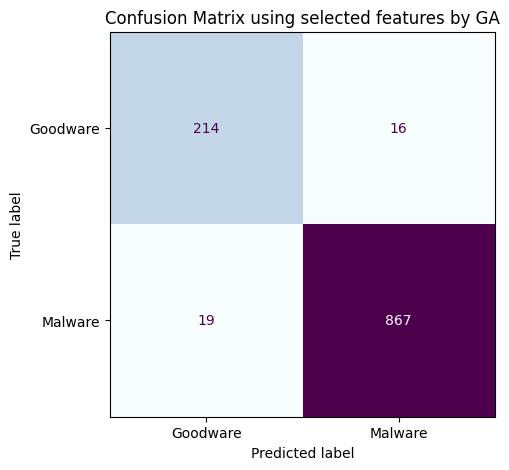

In [ ]:
# Generate confusion matrix and plot it
cm_ga = confusion_matrix(y_test, pred_ga)
cmd_ga = ConfusionMatrixDisplay(cm_ga, display_labels=list(classes.values()))

fig, ax = plt.subplots(figsize=(5, 5))
cmd_ga.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("Confusion Matrix using selected features by GA")
plt.show()

In [ ]:
def compare_performance(acc_before, clf_report_before, acc_after, clf_report_after):
    # Print accuracy scores
    print("Accuracy Score:")
    print("Before GA: {0:.2f} %".format(acc_before * 100))
    print("After GA : {0:.2f} %".format(acc_after * 100))
    print("\n")

    # Print classification reports
    print("Classification Report:")
    print("Before GA:")
    print(clf_report_before)
    print("After GA :")
    print(clf_report_after)

# Call the function with accuracy scores and classification reports before and after GA
compare_performance(acc, clf_report, acc_ga, clf_report_ga)


Accuracy Score:
Before GA: 97.94 %
After GA : 96.86 %


Classification Report:
Before GA:
              precision    recall  f1-score   support

    Goodware       0.95      0.95      0.95       231
     Malware       0.99      0.99      0.99       885

    accuracy                           0.98      1116
   macro avg       0.97      0.97      0.97      1116
weighted avg       0.98      0.98      0.98      1116

After GA :
              precision    recall  f1-score   support

    Goodware       0.92      0.93      0.92       230
     Malware       0.98      0.98      0.98       886

    accuracy                           0.97      1116
   macro avg       0.95      0.95      0.95      1116
weighted avg       0.97      0.97      0.97      1116

